<a href="https://colab.research.google.com/github/Kruglikle/nlp-course/blob/patch-1/Kruglikova_%22tutorial_1_ipynb%22.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Практикум: подготовка к созданию ПО для контент-анализа Telegram

#### Шаг 1: выгрузка данных из Telegram-канала

- выбираем любой Telegram-канал
- находим меню для экспортирования (выгрузки) истории канала
- снимаем все галочки, нам понадобятся только тексты
- настраиваем максимальный размер файла, например, 8 МБ
- выбираем формат `JSON`
- настраиваем папку, куда будут выгружены наши файлы
- дополнительно можно ограничить время публикаций, например, выгрузить данные только за последний месяц

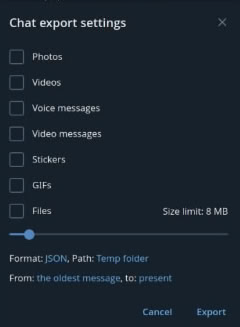

Telegram предлагает нам 2 формата выгрузки данных: `JSON` и `HTML`

**Вопрос:** чем отличаются эти форматы? Где они используются?

Загружаем `result.json` в файловую систему Google Colab

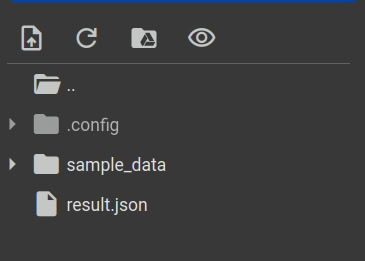

#### Шаг 2: загрузка файла `result.json`

In [37]:
import json

# Загрузка данных
with open("result.json", "r", encoding="utf-8") as f:
    data = json.load(f)

**Вопрос:** что означает `r`? Зачем указывать кодировку файла?

#### Шаг 3: сохраняем все тексты в переменную `texts`

Изучим наш файл. Откройте предпросмотр `result.json`: в выгруженном файле очень много данных, но нам нужен только ключ `text`, именно там хранятся все тексты

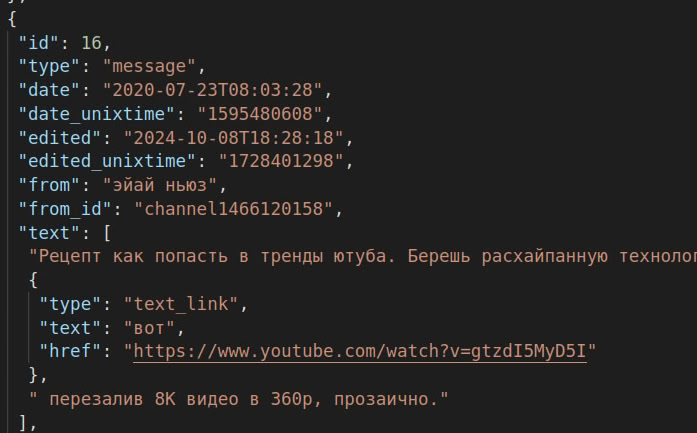

`JSON` в Python эквивалентен типу данных `dict`

In [38]:
type(data)

dict

Выведем список ключей для нашего файла

In [39]:
data.keys()

dict_keys(['name', 'type', 'id', 'messages'])

Нужная информация должна храниться в `messages`. Выведем все ключи для первого элемента `messages`

In [40]:
data['messages'][0].keys()

dict_keys(['id', 'type', 'date', 'date_unixtime', 'edited', 'edited_unixtime', 'from', 'from_id', 'file', 'thumbnail', 'media_type', 'mime_type', 'duration_seconds', 'width', 'height', 'text', 'text_entities', 'reactions'])

Мы нашли ключ `text`

**Задание:** выведите на экран несколько примеров текстов из нашего `JSON` и создайте список текстов из нашего документа

```
ПОДСКАЗКА

- создайте список `texts`
- выполните цикл `for` для каждого сообщения по ключу `messages`
- проверьте тип данных элемента по ключу `['text']`: в нашем документе это могут быть строки или списки
  - если текущий элемент по ключу `['text']` представляет собой список, то
    - для каждого элемента данного списка проверьте его тип данных:
      - если это строка, занесите ее в список `texts`
      - иначе: занесите в список `texts` данные, доступные по ключу `text`
  - иначе: занесите в список `texts` данные, доступные по ключу `text`
```

In [41]:
### Ваш код здесь ###

texts = []
for message in data["messages"]:
    #text_element = message.get("text")

    if isinstance(message["text"], list):
      for text in message["text"]:
        if isinstance(text,str):
          texts.append(text)

        else:
          texts.append (text["text"])
    else:
      texts.append(message["text"])



Посмотрим на результат

**Задание:** импортируйте модуль `random` и выведите первые 100 символов для 10 случайных текстов

```
ПОДСКАЗКА

- с помощью метода `random.sample` создайте список `sample_texts` из 10 случайных текстов из списка `texts`
- с помощью цикла `for` для каждого текста выведите первые 100 символов каждого элемента
```

In [42]:
### Ваш код здесь ###
import random
with open("results.json", "r", encoding="utf-8") as file:
    texts = json.load(file)
sample_texts = random.sample(texts, 10)
for sample_text in sample_texts:
  print(sample_text[:100])



FileNotFoundError: [Errno 2] No such file or directory: 'results.json'

**Вопрос:** проанализируйте результат, какие методы предобработки данных нам нужны?

#### Шаг 4: чистка текста с помощью регулярных выражений

**Основы работы с регулярными выражениями в Python**

```python
import re
```

**Основные функции модуля RE**

```python
re.match(r'pattern', string)   # Совпадение в начале строки
re.search(r'pattern', string)  # Первое совпадение в строке
re.findall(r'pattern', string) # Все совпадения в списке
re.sub(r'pattern', 'repl', string)  # Замена
re.split(r'pattern', string)   # Разделение по шаблону
```

**Символы в RE**

| Шаблон | Значение |
|--------|----------|
| `.`  | Любой символ, кроме `\n` |
| `\d` | Цифра `[0-9]` |
| `\s` | Пробел |
| `\w` | Буква/цифра/`_` |
| `+`  | 1 или более повторений |
| `*`  | 0 или более |
| `?`  | 0 или 1 |
| `^`  | Начало строки |
| `$`  | Конец строки |
| `[]` | Любой из символов |
| `()` | Группа |

Примеры:

```python
re.findall(r'\d+', 'abc123def456')  # Поиск всех совпадений ['123', '456']
re.sub(r'\d+', 'X', 'abc123def456')  # Удаление (фильтрация) 'abcXdefX'
re.split(r'\s+', 'word1   word2')  # Сегментация ['word1', 'word2']
```

Создание шаблонов для повторного использования:

```python
pattern = re.compile(r'\d+')
pattern.findall('abc123def456')  # ['123', '456']
```

**Задание:** выберите паттерн для очистки ваших данных и произведите чистку

```
ПОДСКАЗКА

- импортируйте модуль `re`
- создайте пустой список cleaned_text
- выберите шаблоны для вашего текста, например
  - "https?://\S+" - удаление ссылок
  - "[@#]\w+" - удаление хештегов и упоминаний других пользователей
- примените `re.sub`, чтобы произвести замены совпадений на пустые строки ""
- добавьте очищенные тексты в список `cleaned_text`
```

In [43]:
### Ваш код здесь ###
import re
cleaned_texts = []
for text in texts:
  text = re.sub(r'https?://\S+', '', text)
  text = re.sub(r'[^\w\s]', "", text) #паттерн очистки знаков препинания
  text = re.sub(r'/^[a-zA-Z]+$', '', text) #паттерн слов-латнициц
  text = re.sub(r'[@#]\w+', '', text)
  cleaned_texts.append(text)



#### Шаг 5: удаление стоп-слов

**Вопрос:** как понять, что данное слово нужно удалить из текста?

**Задание:** удалите стоп-слова с помощью списка стоп-слов из `spacy`

Загрузим список стоп-слов для русского языка

In [44]:
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')

stop_words = set(stopwords.words("russian"))

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [45]:
print(list(stop_words)[:10])

['них', 'нет', 'с', 'для', 'бы', 'вдруг', 'тогда', 'впрочем', 'будто', 'нельзя']


```
ПОДСКАЗКА

- создаем список `cleaned_words`
- для каждого нашего текста внутри цикла `for`
- делим текст на слова (text.split())
- приводим слова к нижнему регистру
- если слова нет в списке `stopwords`, добавляем их в список `cleaned_words`
```

In [46]:
### Ваш код здесь ###
cleaned_words = []
for cleaned_text in cleaned_texts:
  text = cleaned_text.split()
  words = []

  for word in text:
    if word.lower() not in stop_words:
      words.append(word)
  cleaned_words.append(words)



In [47]:
print(cleaned_words)

[['Часто', 'измерения', 'больших', 'пространств', 'космосе', 'астрономы', 'используют', 'единицу', 'известную', 'световой', 'год', 'Данная', 'красивая', 'визуализация', 'позволяет', 'понять', 'насколько', 'это', 'самом', 'деле', 'обширна', 'наша', 'вселенная'], [], ['Топливо', 'канала'], [], ['Удивительная', 'система', 'TRAPPIST1'], [], ['Топливо', 'канала'], [], ['Визуализация', 'теории', 'гипотетической', 'планете', 'Тейя', 'столкновение', 'которой', 'Землёй', 'привело', 'образованию', 'Луны'], [], ['Топливо', 'канала'], [], ['Это', 'аналемма', 'Луны', 'Аналемма', 'это', 'кривая', 'цифра', '8', 'которую', 'можете', 'получить', 'отмечаете', 'положение', 'Солнца', 'одно', 'время', 'каждый', 'день', 'течение', 'одного', 'года', 'трюк', 'изображением', 'аналеммы', 'Луны', 'состоит', 'ждать', 'немного', 'дольше', 'среднем', 'Луна', 'каждый', 'день', 'возвращается', 'положение', 'небе', '50', 'минут', '29', 'секунд', 'дольше'], [], ['Топливо', 'канала'], [], ['Вид', 'Италию', 'МКС'], [], [

#### Шаг 6: анализ текста

**Вопрос:** какая информация полезна для контент-анализа?

**Задание:** произвести разметку именованных сущностей с помощью `spacy`



Загружаем русскоязычую модель `spacy`

In [48]:
!python3 -m spacy download ru_core_news_sm -q

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 15.3/15.3 MB 81.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 53.8/53.8 kB 4.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.4/8.4 MB 94.4 MB/s eta 0:00:00
✔ Download and installation successful
You can now load the package via spacy.load('ru_core_news_sm')
⚠ Restart to reload dependencies
If you are in a Jupyter or Colab notebook, you may need to restart Python in
order to load all the package's dependencies. You can do this by selecting the
'Restart kernel' or 'Restart runtime' option.


Производим разметку

In [49]:
import spacy

# Загружаем модель для русского языка
nlp = spacy.load("ru_core_news_sm")

entities = []
for text in cleaned_texts:
    doc = nlp(text)
    # Добавляем метку сущности в список
    entities.extend([ent.label_ for ent in doc.ents])

Визуализируем результат

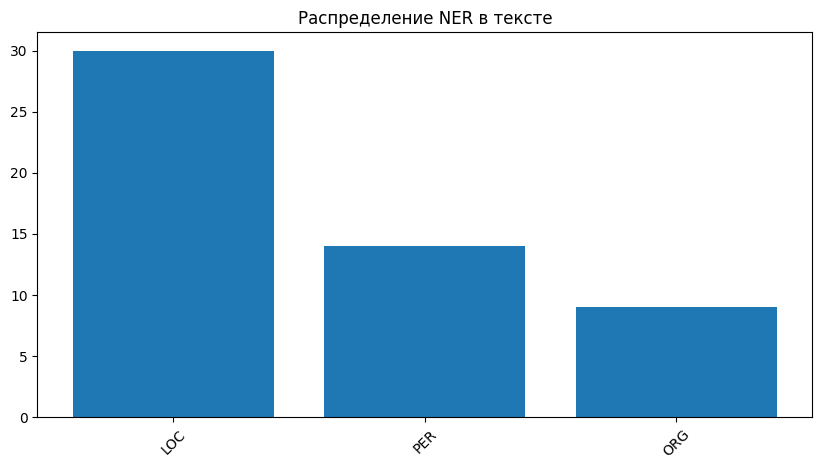

In [50]:
from collections import Counter
import matplotlib.pyplot as plt

# Гистограмма NER
entity_counts = Counter(entities) # Посчитаем количество вхождений именованных сущностей
plt.figure(figsize=(10, 5))
plt.bar(entity_counts.keys(), entity_counts.values())
plt.xticks(rotation=45)
plt.title("Распределение NER в тексте")
plt.show()

In [51]:
# PoS-анализ
pos_counts = Counter()
for text in cleaned_texts:
    doc = nlp(text)
    pos_counts.update([token.pos_ for token in doc])

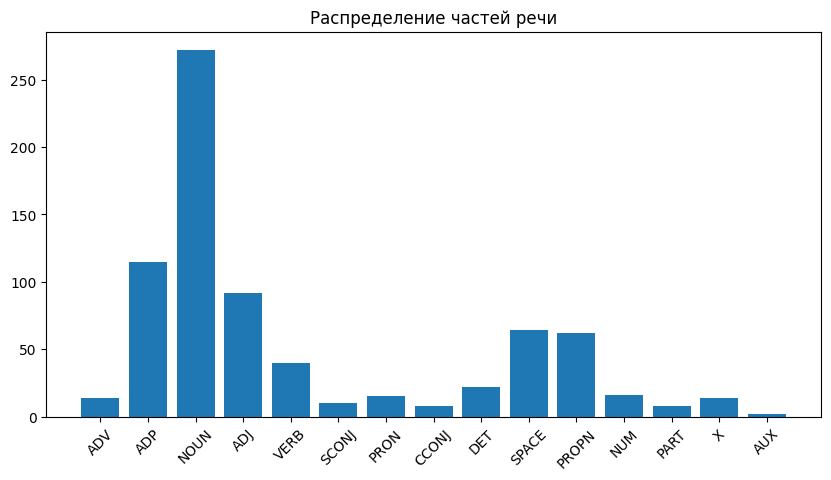

In [52]:
# Гистограмма PoS
plt.figure(figsize=(10, 5))
plt.bar(pos_counts.keys(), pos_counts.values())
plt.xticks(rotation=45)
plt.title("Распределение частей речи")
plt.show()

**Вопрос:** какие методы анализа текста доступны в Spacy?

### Домашнее задание

1. Улучшить очистку данных
  - добавить удаление знаков препинания
  - добавить удаление слов, написанных латиницей
2. Лемматизировать текст
3. Создать частотный словарь лемм с помощью `Counter`
4. Построить гистограмму 20 наиболее частотных лемм
5. С помощью random.sample выбрать случайный текст из нашей выборки: если в этом тексте есть именованные сущности (найдите их с помощью spacy), сделать визуализацию разметки с помощью displacy

```
ПОДСКАЗКА (задание 5)

- записываем в переменную sample случайный текст из выборки
- производим разметку NER
- с помощью IF проверяем, пустой список или нет
- если список именованных сущностей не пустой, передаем текст в displacy

Образец использования displacy:

import spacy
nlp = spacy.load("en_core_web_sm")
doc = nlp("He works at Google.")
spacy.displacy.serve(doc, style="ent")
```

In [53]:
#задание 1 выполнила в ячейке выше

In [54]:
lemmatized_texts = []
for cleaned_text in cleaned_texts:
    doc = nlp(cleaned_text)
    lemmas = [token.lemma_ for token in doc if not token.is_punct and not token.is_space]
    lemmatized_text = ' '.join(lemmas)
    lemmatized_texts.append(lemmatized_text)

    print(lemmatized_text)

Часто для измерение больший пространство в космос астроном использовать единица известный как световой год данная красивый визуализация позволять понять насколько это много и как на самом дело обширный наш вселенная

топливо для канал

удивительный система trappist1

топливо для канал

визуализация теория о гипотетический планета тейя столкновение которой с земля привести к образование луна

топливо для канал

это аналемма луна аналемма это кривой цифра 8 которую вы мочь получить когда отмечать положение солнце в один и тот же время каждый день в течение одного год но трюк с изображение аналемма луна состоять в том чтобы ждать немного долгий в среднее луна каждый день возвращаться в тот же положение на небо на 50 минута и 29 секунда долгий

топливо для канал

вид на италия из мкс

топливо для канал


органический синтез от восход до закат
поверхность солнце снять через красный фильтр выделять только свечение водород лепестки трубка горячий плазма сформировать магнитный силовой линия

т

In [55]:
# PoS-анализ лемм
texts = lemmatized_texts
lemma_counter = Counter()  # Счетчик для лемм

for text in texts:
    doc = nlp(text)
    lemmas = [token.lemma_ for token in doc if not token.is_punct and not token.is_space]
    lemma_counter.update(lemmas)


print(lemma_counter)
pos_counts = Counter(lemmatized_text)
lemma_counter = Counter()




Counter({'для': 45, 'топливо': 45, 'канал': 43, 'в': 17, 'на': 16, 'с': 12, 'это': 8, 'вид': 8, 'из': 8, 'как': 7, 'и': 7, 'система': 7, 'солнечный': 7, 'год': 6, 'земля': 6, 'луна': 6, 'мкс': 6, 'космический': 6, 'космос': 5, 'наш': 5, 'весь': 5, 'изображение': 4, 'от': 4, 'красный': 4, 'марс': 4, 'шаттл': 4, 'аналемма': 3, 'время': 3, 'поверхность': 3, 'сравнение': 3, 'корабль': 3, 'звезда': 3, 'ракета': 3, 'по': 3, 'сатурн': 3, 'известный': 2, 'красивый': 2, 'визуализация': 2, 'планета': 2, 'к': 2, 'образование': 2, 'цифра': 2, 'вы': 2, 'положение': 2, 'солнце': 2, 'один': 2, 'тот': 2, 'же': 2, 'каждый': 2, 'день': 2, 'долгий': 2, 'небо': 2, 'закат': 2, 'водород': 2, 'затмение': 2, 'гора': 2, '1': 2, 'размер': 2, 'снимок': 2, 'экспедиция': 2, 'г': 2, '16': 2, 'самых': 2, 'ночной': 2, 'невероятный': 2, 'юпитер': 2, 'что': 2, 'происходить': 2, 'цвет': 2, 'полёт': 2, 'необычный': 2, 'всего': 2, 'жидкий': 2, '3': 2, 'спутник': 2, 'быть': 2, 'ваш': 2, 'полярный': 2, 'этот': 2, 'за': 2, '

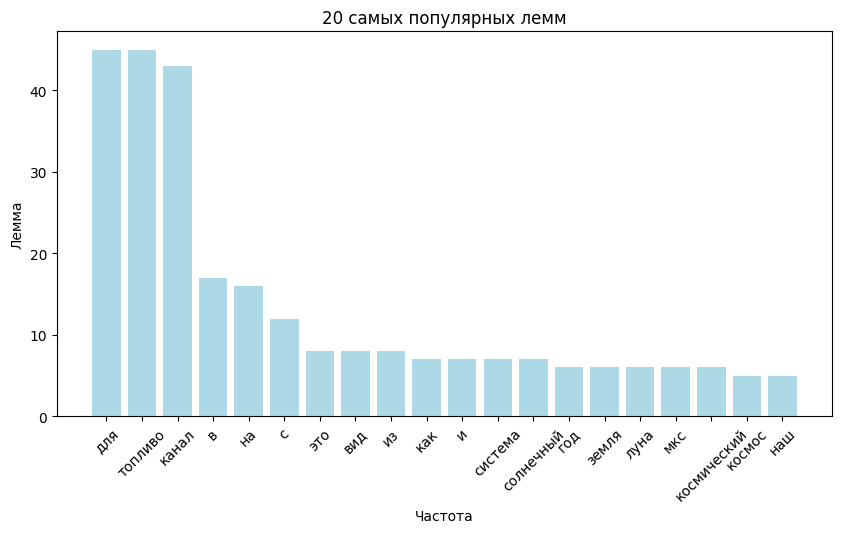

In [56]:
# Гистограмма PoS
lemma_counter = Counter()


for text in lemmatized_texts:
    doc = nlp(text)
    lemmas = [token.lemma_ for token in doc if not token.is_punct and not token.is_space]
    lemma_counter.update(lemmas)

top20lemmas = lemma_counter.most_common(20) #взяла 20 самых

plt.figure(figsize=(10, 5))
plt.bar([lemma[0] for lemma in top20lemmas], [lemma[1] for lemma in top20lemmas], color='lightblue')
plt.xlabel('Частота')
plt.ylabel('Лемма')
plt.title('20 самых популярных лемм')
plt.xticks(rotation=45)
plt.show()


С помощью random.sample выбрать случайный текст из нашей выборки: если в этом тексте есть именованные сущности (найдите их с помощью spacy), сделать визуализацию разметки с помощью displacy

ПОДСКАЗКА (задание 5)

- записываем в переменную sample случайный текст из выборки
- производим разметку NER
- с помощью IF проверяем, пустой список или нет
- если список именованных сущностей не пустой, передаем текст в displacy

Образец использования displacy:

import spacy
nlp = spacy.load("en_core_web_sm")
doc = nlp("He works at Google.")
spacy.displacy.serve(doc, style="ent")

In [87]:
#показывает только текст
import random
import spacy
from spacy import displacy # displacy отвечает за визуализацию
nlp = spacy.load("en_core_web_sm")
sample_text = random.choice(texts)
doc = nlp(sample_text)
print(sample_text)

entities = [ent.label_ for ent in doc.ents] # списковое включение, вытащила из инета

if entities:
    displacy.serve(doc, style="ent")  #из образцца
    #Гистограмма
    entity_counts = Counter(entities)
    plt.figure(figsize=(10, 5))
    plt.bar(entity_counts.keys(), entity_counts.values(), color="blue")
    plt.xticks(rotation=45)
    plt.title("Распределение NER в тексте")
    plt.show()


топливо для канал


Полезные материалы:

- https://www.analyticsvidhya.com/blog/2021/03/beginners-guide-to-regular-expressions-in-natural-language-processing/ - RegEx для обработки естественного языка
- https://spacy.io/api/doc - документация SpaCy